<a href="https://colab.research.google.com/github/mnskartik/CodEvo-Solutions-ML/blob/main/CAT_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [16]:
import zipfile

# Path to the zip file
zip_file_path = '/content/archive (1).zip'

# Directory where the extracted files will be stored
extracted_dir = '/content/dogs_vs_cats/test/dogs_vs_cats/test'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [17]:
# Set paths
data_dir = extracted_dir  # Update to the extracted directory
categories = ['cats', 'dogs']

# Prepare data
data = []
img_size = 128

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img_array, (img_size, img_size))
        data.append([img_resized, class_num])


In [18]:
np.random.shuffle(data)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

X = X / 255.0  # Normalize the data

Applying Transformations

In [19]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
# Split your data into training and validation sets *before* using ImageDataGenerator
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data generators for training and validation sets separately
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

# Fit the model using the generators
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5218 - loss: 0.7334 - val_accuracy: 0.5420 - val_loss: 0.6873
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5627 - loss: 0.6814 - val_accuracy: 0.5670 - val_loss: 0.6789
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.5602 - loss: 0.6846 - val_accuracy: 0.5790 - val_loss: 0.6787
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.5668 - loss: 0.6816 - val_accuracy: 0.5910 - val_loss: 0.6631
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.5816 - loss: 0.6682 - val_accuracy: 0.5340 - val_loss: 0.7214
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5834 - loss: 0.6751 - val_accuracy: 0.6340 - val_loss: 0.6417
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6221 - loss: 0.6455 - val_accuracy: 0.5990 - val_loss: 0.6654
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6110 - loss: 0.6465 - val_accuracy: 0.628

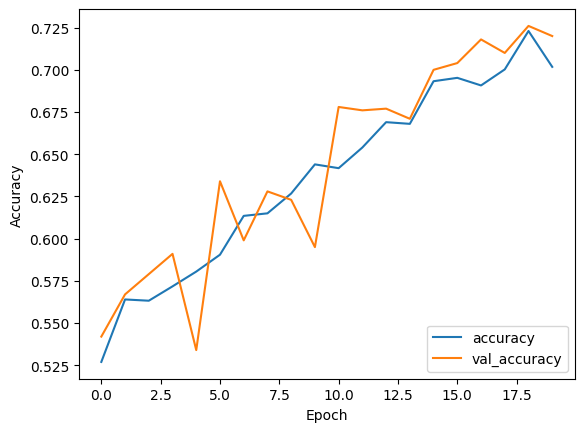

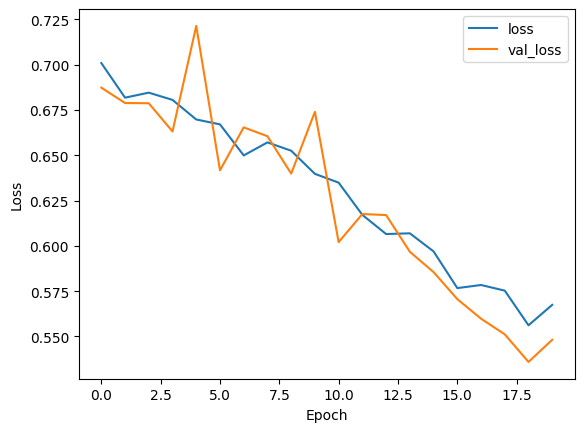

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [25]:
predictions = model.predict(X)


157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 354ms/step


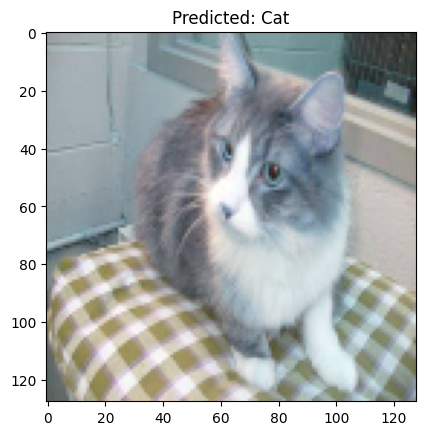

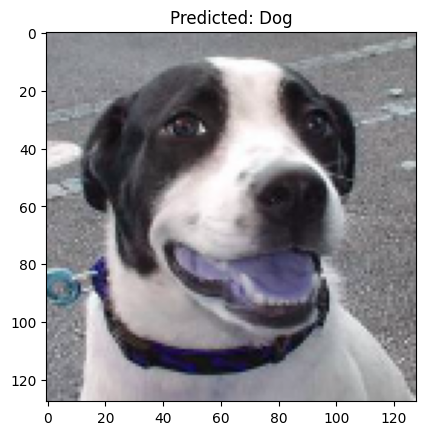

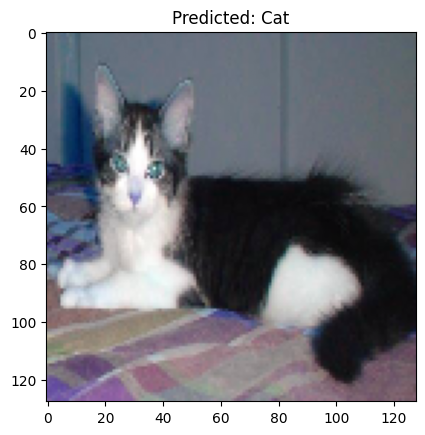

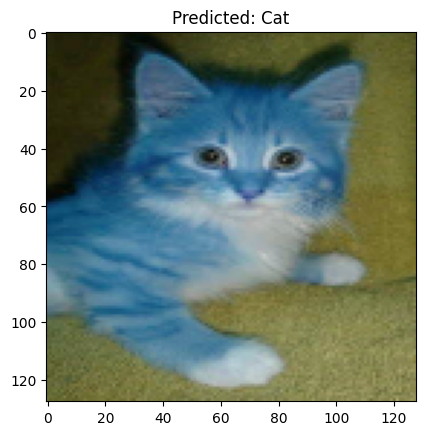

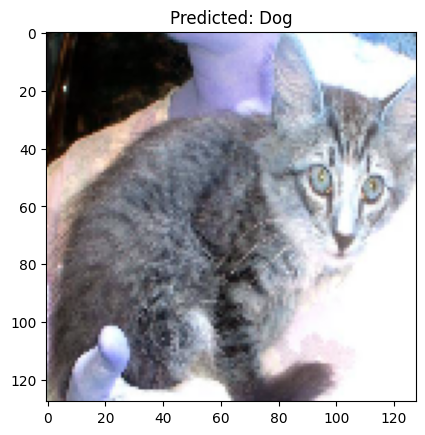

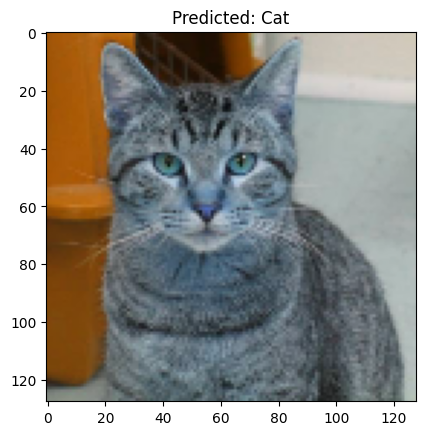

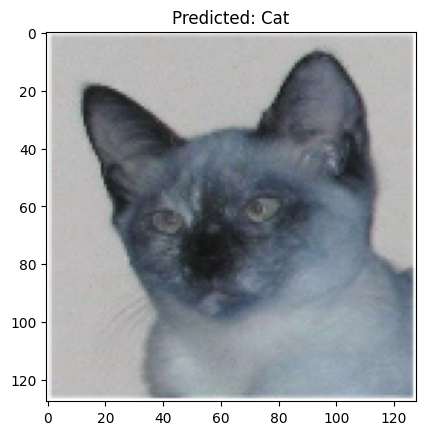

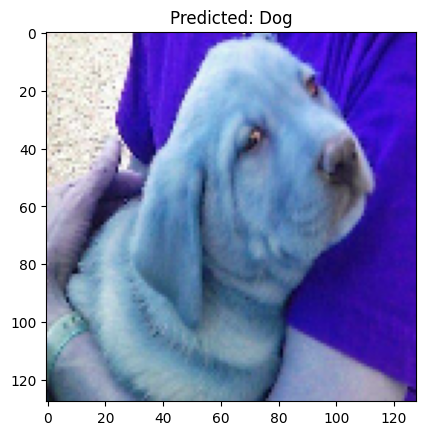

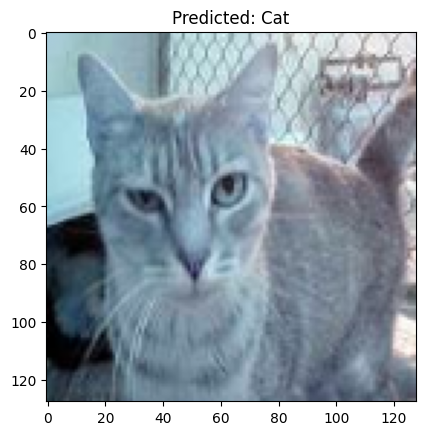

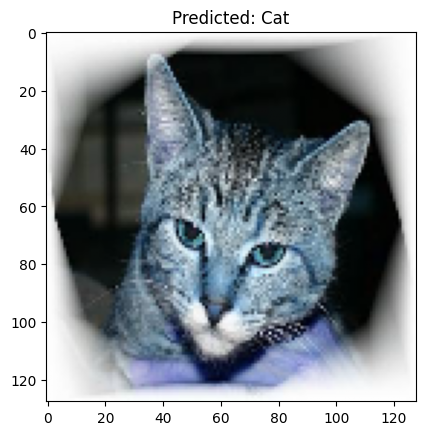

In [26]:
for i in range(10):
    plt.imshow(X[i])
    plt.title(f"Predicted: {'Dog' if predictions[i] > 0.5 else 'Cat'}")
    plt.show()
